# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
realized_pnl_time=pd.DataFrame()
for key in profit_and_loss:

    temp=profit_and_loss[key]
    realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)

realized_pnl_time.columns=realized_pnl_time.columns+'USDT'

realized_pnl_time=realized_pnl_time.sort_index().fillna(0)
realized_pnl_time.index=realized_pnl_time.index.strftime(date_format='%Y-%m-%d')
realized_pnl_time.groupby(realized_pnl_time.index).sum()
realized_pnl_time=realized_pnl_time.cumsum()
realized_pnl_time = realized_pnl_time[~realized_pnl_time.index.duplicated(keep='last')]
realized_pnl_time=realized_pnl_time.sum(axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14588\1326421339.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  realized_pnl_time=pd.concat([realized_pnl_time,temp],axis=0)


In [15]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [16]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [17]:
holding=Binance.get_inventory()

In [18]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4544.763991,1.0000,-131.886217,2359.84,2227.953783
OMUSDT,526.319895,2744.059096,0.6038,0.000000,2217.74,2217.740000
BTCUSDT,601.021649,856.350669,0.1884,3.537078,255.33,258.867078
SOLUSDT,281.200518,344.678201,0.0758,0.000000,63.48,63.480000
JASMYUSDT,387.458505,279.396976,0.0615,0.000000,-108.06,-108.060000
ETHUSDT,250.747339,188.017300,0.0414,0.000000,-62.73,-62.730000
TRXUSDT,76.868953,111.784937,0.0246,-10.723889,34.92,24.196111
BBUSDT,60.176053,19.487401,0.0043,-39.733101,-40.69,-80.423101
BNBUSDT,1.142121,0.989407,0.0002,-10.606040,-0.15,-10.756040
PEPEUSDT,0.000004,0.000002,0.0000,-38.521986,-0.00,-38.521986


In [19]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

433

In [20]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [21]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [22]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [23]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [24]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [25]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [27]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [28]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [29]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [30]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [31]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [32]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [33]:
# pnl_history['Total']

In [34]:
#pnl_history['Total']-pnl_history['Total'].shift(1)

In [35]:
realized_pnl_time2=pd.DataFrame()

realized_pnl_time2.index=quantities.index
realized_pnl_time2=realized_pnl_time2.sort_index()

realized_pnl_time2.index=realized_pnl_time2.index.strftime(date_format='%Y-%m-%d')

    
realized_pnl_time2=pd.concat([realized_pnl_time2,realized_pnl_time])

realized_pnl_time2=realized_pnl_time2.sort_index().fillna(0)
realized_pnl_time2.index=pd.to_datetime(realized_pnl_time2.index)
realized_pnl_time2.groupby(realized_pnl_time2.index).sum()

realized_pnl_time2 = realized_pnl_time2[~realized_pnl_time2.index.duplicated(keep='first')]

realized_pnl_time2.columns=['Realized PnL']

In [36]:
realized_pnl_time2=realized_pnl_time2.fillna(0)

In [37]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1)+realized_pnl_time2['Realized PnL'].loc[quantities.index].cumsum().shift(-1)

In [38]:
pnl_history['Total']

2024-09-23    -242.846960
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-02-01    2121.973187
2025-02-02    1872.990523
2025-02-03    2467.233102
2025-02-04    2239.692343
2025-02-05            NaN
Name: Total, Length: 136, dtype: float64

In [39]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24   -108.382879
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-02-01   -158.536893
2025-02-02   -248.982664
2025-02-03    594.242579
2025-02-04   -227.540759
2025-02-05           NaN
Name: Total, Length: 136, dtype: float64

In [40]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [41]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [42]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [43]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\Admin\AppData\Local\Temp\ipykernel_14588\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [44]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [45]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [46]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

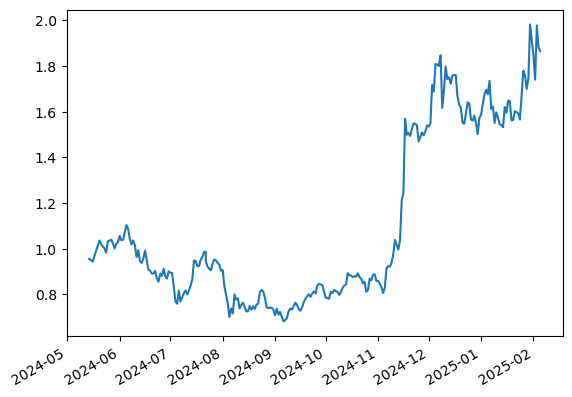

In [47]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [49]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [52]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [53]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [56]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.5295
BNBUSDT,0.1439
XRPUSDT,0.1289
DEXEUSDT,0.0676
SUIUSDT,0.0557
PEPEUSDT,0.0451
RAYUSDT,0.0162
AAVEUSDT,0.0072
TRXUSDT,0.0059
BONKUSDT,0.0000


In [57]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.484015
BTCUSDT,0.300000
XRPUSDT,0.079891
DEXEUSDT,0.059296
SUIUSDT,0.038675
BNBUSDT,0.023695
PEPEUSDT,0.007741
RAYUSDT,0.003928
TRXUSDT,0.002759


### Current results

In [59]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [60]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.570742
BTCUSDT,0.322602
TRXUSDT,0.106656


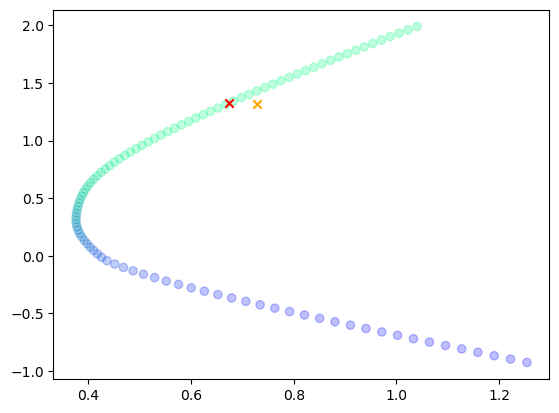

In [61]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [63]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2744.059096,0.603785,0.570742,0.033043
BTCUSDT,856.350669,0.188426,0.322602,-0.134176
SOLUSDT,344.678201,0.075841,0.000000,0.075841
JASMYUSDT,279.396976,0.061477,0.000000,0.061477
ETHUSDT,188.017300,0.041370,0.000000,0.041370
TRXUSDT,111.784937,0.024596,0.106656,-0.082060
BBUSDT,19.487402,0.004288,0.000000,0.004288
BNBUSDT,0.989407,0.000218,0.000000,0.000218
PEPEUSDT,0.000002,0.000000,0.000000,0.000000


In [64]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2744.059096,0.603785,0.484015,0.119770
BTCUSDT,856.350669,0.188426,0.300000,-0.111574
SOLUSDT,344.678201,0.075841,0.000000,0.075841
JASMYUSDT,279.396976,0.061477,0.000000,0.061477
ETHUSDT,188.017300,0.041370,0.000000,0.041370
TRXUSDT,111.784937,0.024596,0.002759,0.021837
BBUSDT,19.487402,0.004288,0.000000,0.004288
BNBUSDT,0.989407,0.000218,0.023695,-0.023477
PEPEUSDT,0.000002,0.000000,0.007741,-0.007741
XRPUSDT,0.000000,0.000000,0.079891,-0.079891


# Risk Reward Analysis

In [66]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [67]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

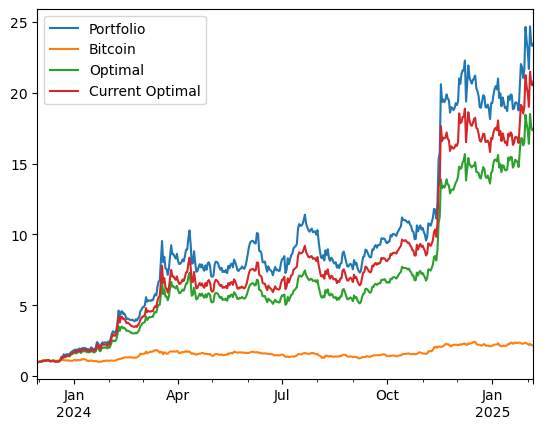

In [68]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [69]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

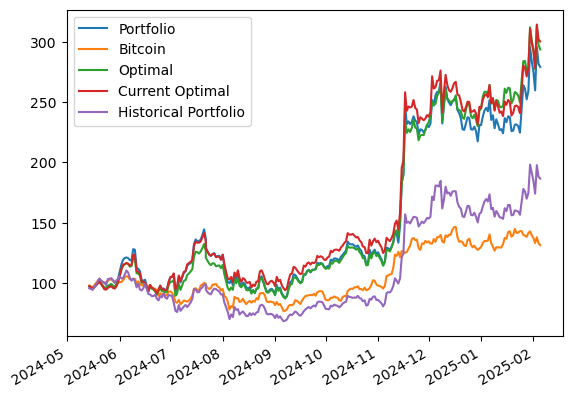

In [70]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [71]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-27,261.200287,139.267274,284.215475,278.511415,175.966487
2025-01-28,252.370933,138.244001,275.563352,271.301926,169.963707
2025-01-29,259.349904,141.476921,279.166969,278.235207,174.562610
2025-01-30,295.361175,142.820328,312.137786,310.938761,198.187203
2025-01-31,283.983276,139.657879,301.351799,299.117302,191.324410
2025-02-01,275.008102,137.190295,293.334048,292.722108,184.686080
2025-02-02,259.795371,133.129604,277.484565,278.275569,174.094032
2025-02-03,295.872613,137.983551,312.986263,314.428570,197.785838
2025-02-04,281.688127,133.040925,297.681624,302.033466,188.190244
2025-02-05,279.247718,131.465707,293.730194,300.436780,186.561035


## Volatilities

In [73]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.710975
 dtype: float64,
 0.7117718524659256)

In [74]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.729436
 dtype: float64,
 0.7294363175411569)

In [75]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.838957
Bitcoin            0.426879
Optimal            0.711772
Current Optimal    0.779009
dtype: float64

In [76]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4700185681076398

In [77]:
days=90
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.8088502204863293

In [78]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.81300737922858

## Risk Contribution

In [80]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.026415,0.023695,0.001378,0.006272,0.000245,0.006027
BTCUSDT,0.358004,0.300000,0.018096,0.099954,0.032372,0.067582
DEXEUSDT,0.116624,0.059296,0.004838,0.031355,0.006008,0.025347
OMUSDT,34.647559,0.484015,0.966160,0.803752,0.711669,0.092083
PEPEUSDT,0.010931,0.007741,0.000514,0.004906,0.000184,0.004722
RAYUSDT,0.012809,0.003928,0.000460,0.002998,0.000042,0.002956
SUIUSDT,0.058043,0.038675,0.002660,0.018917,0.002689,0.016228
TRXUSDT,0.001647,0.002759,0.000121,0.000615,0.000007,0.000608
XRPUSDT,0.130024,0.079891,0.005773,0.031232,0.005788,0.025444


In [81]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.239147,0.570742,0.824165,0.856474,0.775577,0.080897
BTCUSDT,0.132494,0.322602,0.133484,0.097888,0.037231,0.060657
TRXUSDT,0.037735,0.106656,0.042351,0.045638,0.016965,0.028673


In [82]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.377709,0.606061,0.868603,0.837774,0.747204,0.090570
BTCUSDT,0.078822,0.191919,0.078815,0.055949,0.011258,0.044691
SOLUSDT,0.002594,0.080808,0.024279,0.042105,0.005480,0.036624
JASMYUSDT,-0.022464,0.060606,0.011103,0.044317,0.008583,0.035734
ETHUSDT,-0.008672,0.040404,0.009238,0.013540,0.000917,0.012623
TRXUSDT,0.007147,0.020202,0.007962,0.006316,0.000520,0.005796


# Value At Risk

## Historical

### Optimal Weights

In [86]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.05368370715753959, -0.08020830575481505)

### Current Weights

In [88]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.05066599210988321, -0.07620596488641164)

In [89]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [90]:
var=historical_var.iloc[row]
var

OMUSDT      -0.032718
BTCUSDT     -0.004268
SOLUSDT     -0.005809
JASMYUSDT   -0.006690
ETHUSDT     -0.001546
TRXUSDT     -0.000247
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.051278
Name: 2024-10-25 00:00:00, dtype: float64

In [91]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.059370
BTCUSDT     -0.005071
SOLUSDT     -0.004344
JASMYUSDT   -0.005036
ETHUSDT     -0.001735
TRXUSDT     -0.000651
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.076206
dtype: float64

## Parametric

### Optimal Weights

In [94]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.0737509800583801, -0.09452836541817822)

### Current Weights

In [96]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.07558130196137738, -0.0968743320418416)

## Multivariate

### Optimal Weights

In [99]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06665008436899295, -0.08417977022420828)

### Current Weights

In [101]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.0676722207233685, -0.08731141153680215)

In [102]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.058034
BTCUSDT     -0.004295
SOLUSDT     -0.003193
JASMYUSDT   -0.003188
ETHUSDT     -0.001137
TRXUSDT     -0.000250
Portfolio   -0.070098
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [106]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06463425629962694, -0.08378122843023265)

### Current Weights

In [108]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06951297313003976, -0.08892755312131559)

In [109]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.058605
BTCUSDT     -0.003781
SOLUSDT     -0.003146
JASMYUSDT   -0.003399
ETHUSDT     -0.001044
TRXUSDT     -0.000322
Portfolio   -0.070297
dtype: float64

## Student Copula

### Optimal Weights

In [112]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06546297228676264, -0.08466763632005504)

### Current Weights

In [114]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06969676176602857, -0.0916850894268464)

In [115]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.059265
BTCUSDT     -0.003973
SOLUSDT     -0.003462
JASMYUSDT   -0.003550
ETHUSDT     -0.001154
TRXUSDT     -0.000275
Portfolio   -0.071679
dtype: float64

## Gumbel Copula

### Optimal Weights

In [118]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.1298005719266336, -0.18659489035477234)

### Current Weights

In [120]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.14334877587333014, -0.20017483399985747)

In [121]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.141505
BTCUSDT      0.000939
SOLUSDT     -0.000942
JASMYUSDT   -0.000479
ETHUSDT      0.000151
TRXUSDT     -0.000022
Portfolio   -0.141858
dtype: float64

## Monte Carlo

### Optimal

In [124]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [125]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07396963220349675, -0.0926953660880517)

### Current Weights

In [127]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07722414988220609, -0.09695325642590544)

In [128]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.064283
BTCUSDT     -0.004294
SOLUSDT     -0.003477
JASMYUSDT   -0.003514
ETHUSDT     -0.001112
TRXUSDT     -0.000386
Portfolio   -0.077066
dtype: float64

## VaR Violation

In [130]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.061834,-0.110697,-0.092518,-0.021923
2024-01-15,-0.061834,-0.110687,-0.095928,0.016606
2024-01-16,-0.061834,-0.110858,-0.090325,0.054525
2024-01-17,-0.061834,-0.113023,-0.094168,-0.033919
2024-01-18,-0.061834,-0.115356,-0.095824,-0.036873
...,...,...,...,...
2025-02-02,-0.056542,-0.089992,-0.087980,-0.054032
2025-02-03,-0.056542,-0.104431,-0.095697,0.127941
2025-02-04,-0.056542,-0.106965,-0.099098,-0.048899
2025-02-05,-0.056542,-0.106732,-0.097896,-0.013274


In [131]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.041094,-0.083813,-0.081578,-0.015445
2024-05-29,-0.041094,-0.081585,-0.077115,-0.007437
2024-05-30,-0.041094,-0.071248,-0.072859,0.027658
2024-05-31,-0.041094,-0.074225,-0.069776,0.044388
2024-06-01,-0.041094,-0.079448,-0.075726,0.060689
...,...,...,...,...
2025-02-02,-0.054538,-0.129944,-0.123805,-0.055317
2025-02-03,-0.052966,-0.146286,-0.131160,0.138868
2025-02-04,-0.054285,-0.151626,-0.134200,-0.047941
2025-02-05,-0.054285,-0.152315,-0.135516,-0.008664


<Axes: >

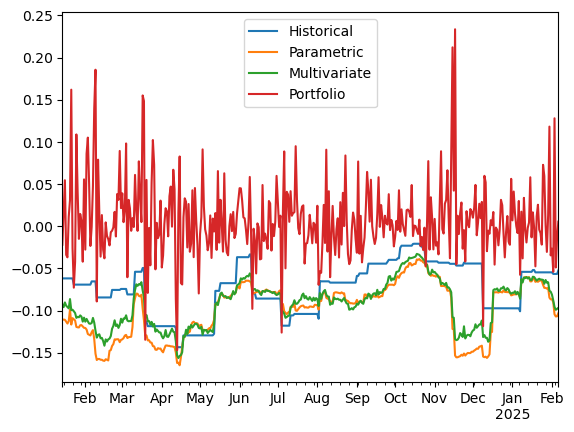

In [132]:
var_data.plot()

<Axes: >

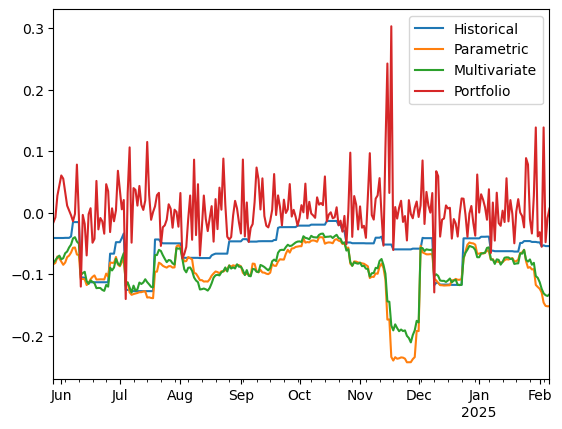

In [133]:
current_var_data.plot()

In [134]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.023077,0.007692,0.010256
Kupiec Stat,7.377381,22.493333,18.966629
P-value,0.006605,0.000002,0.000013


In [135]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.058824,0.015686,0.011765
Kupiec Stat,0.396531,8.538414,11.20574
P-value,0.528886,0.003477,0.000815


# Principal Component Analysis

## Historical PCA

In [138]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.78570733, 0.06811331, 0.05595406, 0.05002646, 0.04019883])

In [139]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.016171
ADAUSDT     0.016149
ALGOUSDT    0.018591
APTUSDT     0.016792
ARBUSDT     0.017972
              ...   
WBTCUSDT    0.009187
WLDUSDT     0.022632
XLMUSDT     0.013494
XRPUSDT     0.011629
XTZUSDT     0.016715
Name: PC1, Length: 61, dtype: float64

<Axes: >

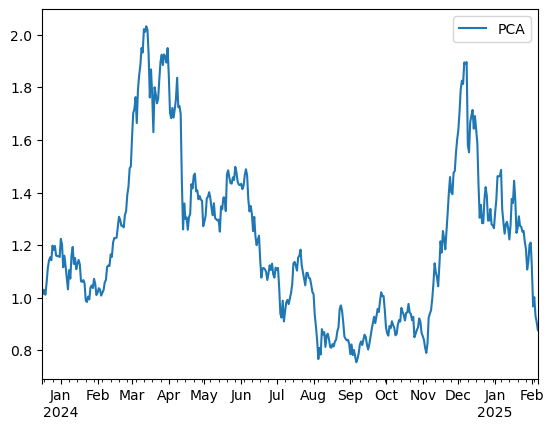

In [140]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

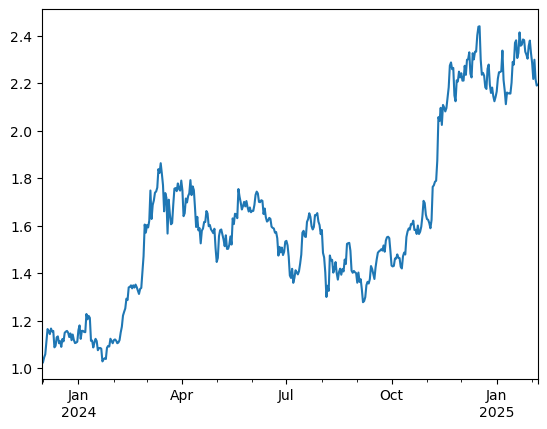

In [141]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [142]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.425586
WBETHUSDT    0.443960
ETHUSDT      0.444201
ATOMUSDT     0.462983
DOTUSDT      0.463632
ETCUSDT      0.468541
NEXOUSDT     0.479806
ADAUSDT      0.506578
EOSUSDT      0.525239
WBTCUSDT     0.526900
BTCUSDT      0.527412
AVAXUSDT     0.531420
IOTAUSDT     0.550879
FILUSDT      0.560907
ARBUSDT      0.568999
GRTUSDT      0.578968
XTZUSDT      0.583892
LINKUSDT     0.597598
IMXUSDT      0.608543
dtype: float64

<Axes: >

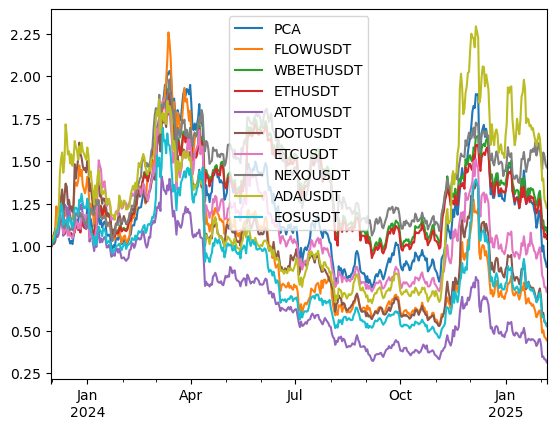

In [143]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

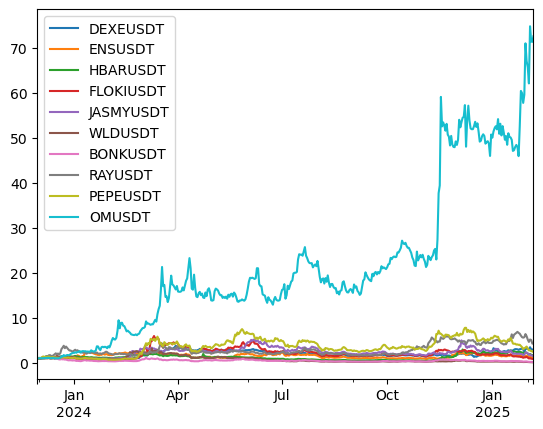

In [144]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [146]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.56889971, 0.14726823, 0.11846242, 0.09491194, 0.0704577 ])

In [147]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.095765
BTCUSDT      0.059227
SOLUSDT      0.097726
JASMYUSDT    0.176285
ETHUSDT      0.084410
TRXUSDT      0.055618
BBUSDT       0.206104
BNBUSDT      0.065267
PEPEUSDT     0.159598
Name: PC1, dtype: float64

<Axes: >

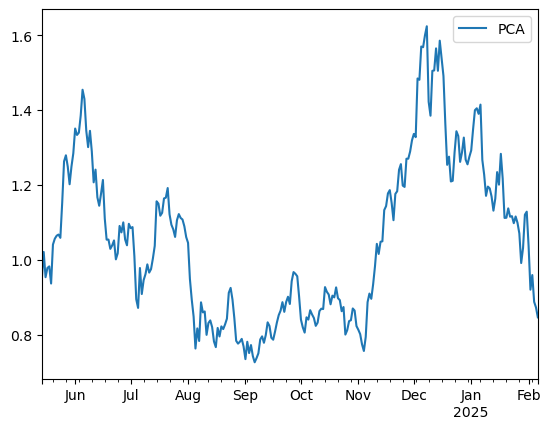

In [148]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

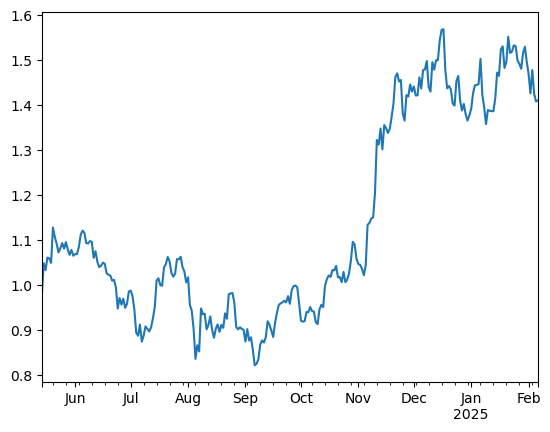

In [149]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [150]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.435088
BNBUSDT      0.469133
BTCUSDT      0.490483
SOLUSDT      0.492672
JASMYUSDT    0.692023
PEPEUSDT     0.744342
BBUSDT       0.776219
TRXUSDT      0.904026
OMUSDT       0.974355
dtype: float64

<Axes: >

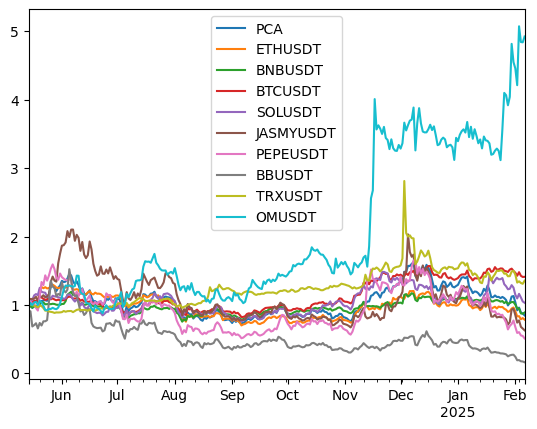

In [151]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [153]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.907745
BBUSDT       1.579934
JASMYUSDT    1.344322
SOLUSDT      1.166322
BTCUSDT      1.000000
ETHUSDT      0.971617
OMUSDT       0.894649
BNBUSDT      0.667555
TRXUSDT      0.328183
Name: BTCUSDT, dtype: float64

In [154]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.463997
PEPEUSDT     2.145237
BBUSDT       1.915619
SOLUSDT      1.464463
OMUSDT       1.157285
ETHUSDT      1.093066
TRXUSDT      1.018838
BTCUSDT      1.000000
BNBUSDT      0.726090
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [156]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [157]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.358337
BBUSDT,0.286757
TRXUSDT,0.165381
PEPEUSDT,0.127783
ETHUSDT,0.109585
SOLUSDT,0.075261
JASMYUSDT,0.068408
BNBUSDT,0.031499
OMUSDT,0.021598


### Regression to PCA

In [159]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.7128617793422727

In [160]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.302854
BNBUSDT      1.181242
ETHUSDT      1.027210
PCA          1.000000
SOLUSDT      0.751702
JASMYUSDT    0.440880
PEPEUSDT     0.417580
BBUSDT       0.386711
TRXUSDT      0.264877
OMUSDT       0.244685
dtype: float64

In [161]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.796805
BNBUSDT      1.673194
ETHUSDT      1.242250
TRXUSDT      1.116692
PCA          1.000000
BBUSDT       0.729865
PEPEUSDT     0.648922
JASMYUSDT    0.519449
SOLUSDT      0.448306
OMUSDT       0.300789
dtype: float64

### Correlation Matrix

<Axes: >

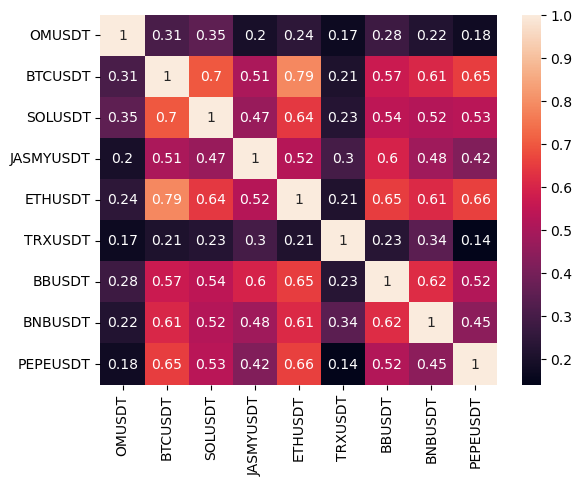

In [163]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

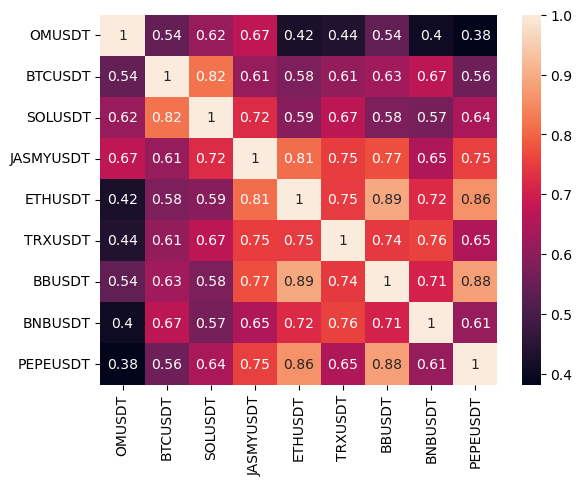

In [164]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [166]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414563,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [167]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-07-01,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.945506,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-31,0.030837,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.614186,0.0
2024-08-30,0.135846,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.864154,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-09-29,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.053254,0.0
2024-10-29,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.569405,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-28,0.007546,0.0,0.017284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.120995,0.322979,0.0
2024-12-28,0.688723,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-27,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.401371,0.0
2025-02-06,0.007546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [168]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      0.992454
AAVEUSDT    0.007546
LDOUSDT     0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
NEARUSDT    0.000000
Name: 2025-02-06 00:00:00, dtype: float64